In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


2 and 3.1

In [2]:
url = (
    "https://archive.ics.uci.edu/ml/"
    "machine-learning-databases/heart-disease/processed.cleveland.data"
)
cols = [
    "age",         # age in years
    "sex",         # 1 = male; 0 = female
    "cp",          # chest pain type (1–4)
    "trestbps",    # resting blood pressure
    "chol",        # serum cholesterol in mg/dl
    "fbs",         # fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    "restecg",     # resting electrocardiographic results (0–2)
    "thalach",     # maximum heart rate achieved
    "exang",       # exercise induced angina (1 = yes; 0 = no)
    "oldpeak",     # ST depression induced by exercise relative to rest
    "slope",       # the slope of the peak exercise ST segment (1–3)
    "ca",          # number of major vessels (0–3) colored by fluoroscopy
    "thal",        # 3 = normal; 6 = fixed defect; 7 = reversable defect
    "target"       # diagnosis of heart disease (0 = no disease, 1–4 = disease)
]

df = pd.read_csv(url,names=cols,na_values='?')
#print(df.shape)
print(df.head())
#print(df.info(),'\n')
#print(df.isnull().sum())#no null values
#print(df.describe())
df.fillna(df.median(numeric_only=True),inplace=True)
#print(df.isnull().sum())
df['target']=df['target'].apply(lambda x:0 if x==0 else 1)


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=scaler.fit_transform((df.iloc[:,:-1]))
target=df.iloc[:,-1]
df2=pd.DataFrame(features,columns=df.columns[:-1])
df2['target']=target
print(df2.head())



        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004       0  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238       1  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752       1  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238       0  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238       0  


3.2

Inference(below block)- The Loggistic regression performs wells compared to random forest. In the binary target Loggistic regression is better despite of random forest being good in handeling randomness

Logistic regression accuracy 0.8852459016393442
Random Forest accuracy 0.8688524590163934
Logistic regression f1 score 0.8923076923076924
Random Forest f1 score 0.8709677419354839
Logistic regression precision 0.8787878787878788
Random Forest precision 0.9
Logistic regression recall 0.90625
Random Forest recall 0.84375


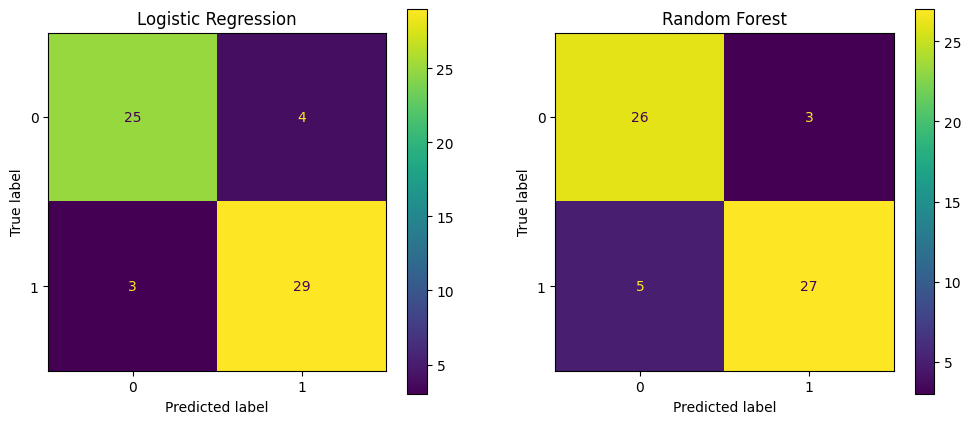

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score, ConfusionMatrixDisplay,mean_squared_error
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred1=logistic_model.predict(X_test)

tree_model=RandomForestClassifier()
tree_model.fit(X_train,y_train)
y_pred2=tree_model.predict(X_test)

print(f"Logistic regression accuracy {accuracy_score(y_test,y_pred1)}")
print(f"Random Forest accuracy {accuracy_score(y_test,y_pred2)}")
print(f"Logistic regression f1 score {f1_score(y_test,y_pred1)}")
print(f"Random Forest f1 score {f1_score(y_test,y_pred2)}")
print(f"Logistic regression precision {precision_score(y_test,y_pred1)}")
print(f"Random Forest precision {precision_score(y_test,y_pred2)}")
print(f"Logistic regression recall {recall_score(y_test,y_pred1)}")
print(f"Random Forest recall {recall_score(y_test,y_pred2)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1, ax=axes[0])
axes[1].set_title("Random Forest")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, ax=axes[1])
axes[0].set_title("Logistic Regression")
plt.show()



3.3

Inference - The heatmap reveals which features move together. For example, if cholesterol and age have a high positive correlation, it suggests older patients tend to have higher cholesterol in this dataset.

In [5]:
colmns=list(df2.columns)
i,j=colmns.index('chol'),colmns.index('target')
colmns[i],colmns[j]=colmns[j],colmns[i]
df3=df2[colmns]
print(df3.head())
arr=df.values
X_train,X_test,y_train,y_test=train_test_split(arr[:,:-1],arr[:,-1],test_size=0.2,random_state=42)

linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)
print(f"Linear regression mean squared error= {mean_squared_error(y_test,y_pred)}")


        age       sex        cp  trestbps  target       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525       0  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220       1 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300       1 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170       0 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170       0 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal      chol  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004 -0.264900  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238  0.760415  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752 -0.342283  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238  0.063974  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238 -0.825922  
Linear regression mean squared error= 0.11099904045946338


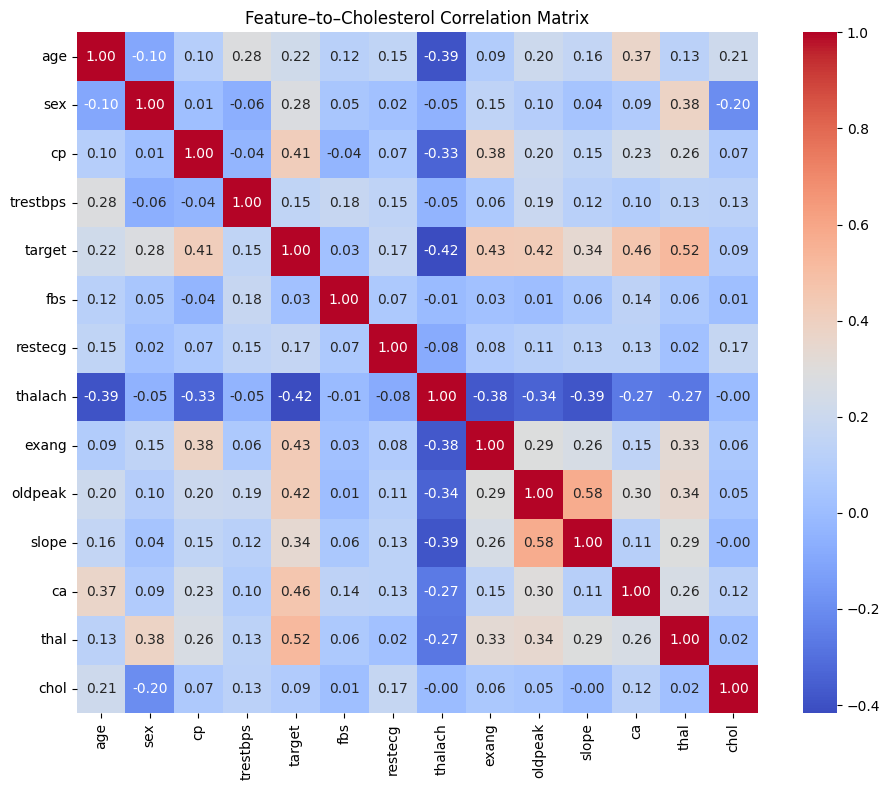

chol        1.000000
age         0.208950
sex         0.199915
restecg     0.171043
trestbps    0.130120
ca          0.123726
Name: chol, dtype: float64


In [6]:
df4=df3.iloc[:,:-1]
y=df3.iloc[:,-1]
df_corr = pd.concat([df4, y.rename('chol')], axis=1)
corr_matrix = df_corr.corr()

plt.figure(figsize=(10,8))
plt.title("Feature–to–Cholesterol Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm',square=True)
plt.tight_layout()
plt.show()


top_corr = corr_matrix['chol'].abs().sort_values(ascending=False)
print(top_corr.head(6))
#The serum cholesterol is most correlated with age,gender,resting electrocardiographic results, but if we see, it is not that highly corelated, lies in blue region of heatmap.

3.4

Inference-By retaining only enough principal components to explain 95 % of total variance, I reduce dimensionality while preserving most information.
By conserving 95 percent of the variance could reduce only 2 dimensions.

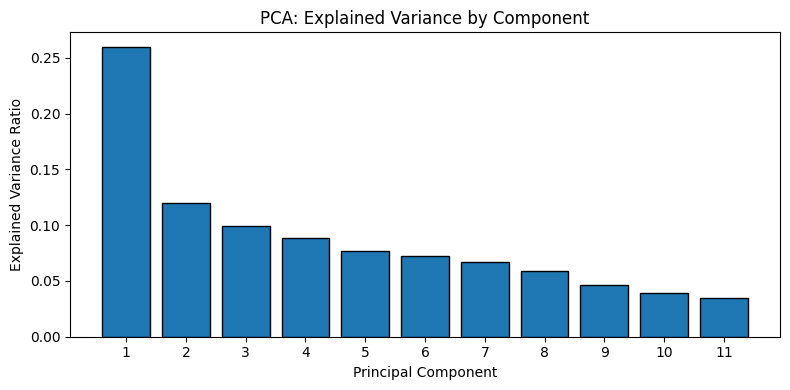

The reduced dimnsion(303, 11) from (303, 13)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca=pca.fit_transform(df4)

exp_var = pca.explained_variance_ratio_

exp_var = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, len(exp_var) + 1),exp_var,edgecolor='k')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Explained Variance by Component')
plt.xticks(np.arange(1, len(exp_var) + 1))
plt.tight_layout()
plt.show()
print(f"The reduced dimnsion{X_pca.shape} from {df4.shape}")


3.5

Inference- The “elbow” in the inertia plot indicates diminishing returns in reducing within‑cluster variance beyond a certain k. The peak in silhouette score shows which k yields the best separation. Together, they guide you to an optimal number of clusters.
From seeing the graph of the elbow, we can see that from k=5  the change is significant and then it decreases, so by this method, k=5 is the optimal value, but seeing the graphs, the silhouette value of optimal k gave a better value.


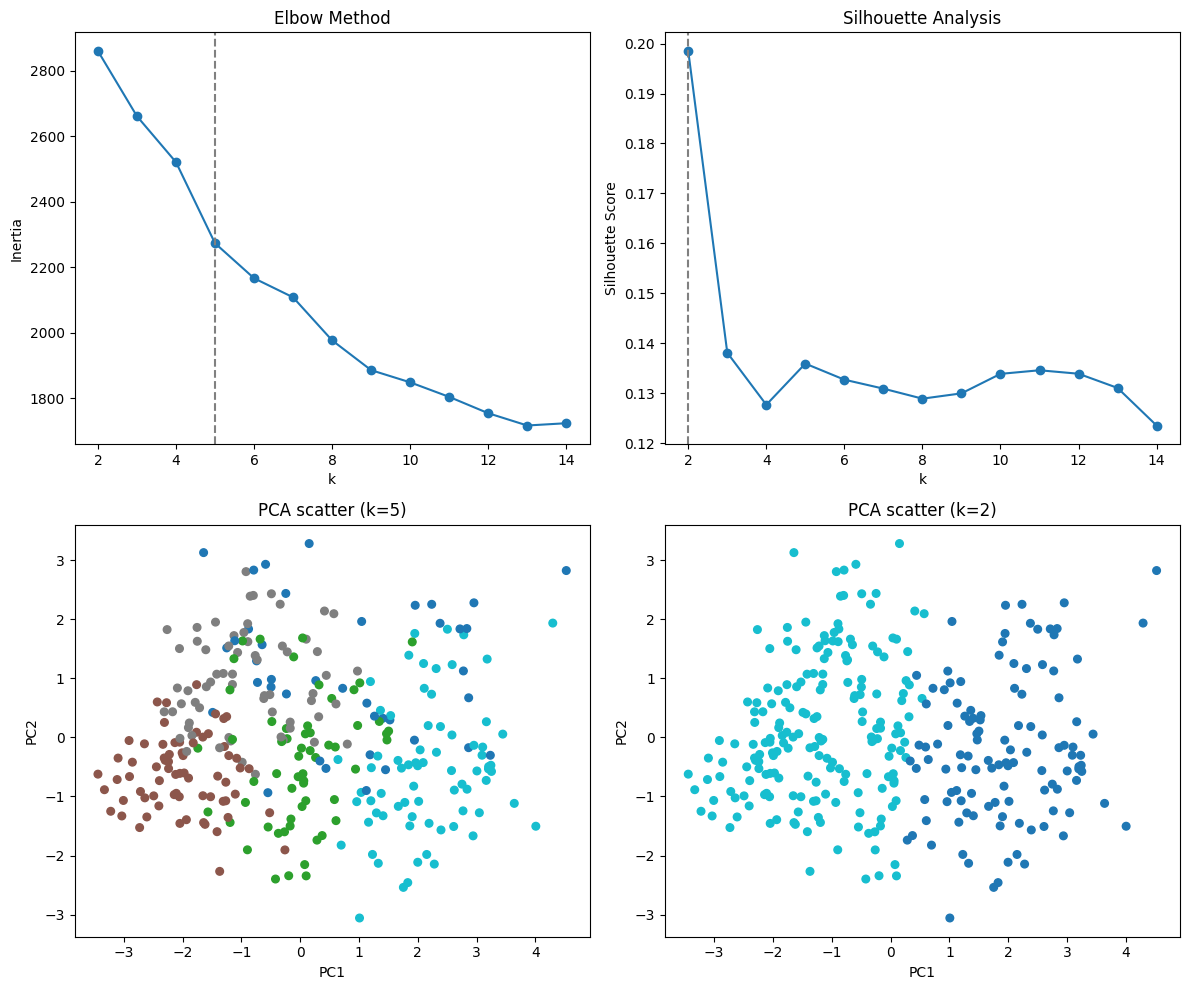

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
cluster_range = range(2, 15)
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertias.append(km.inertia_)

sil_scores = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    sil_scores.append(silhouette_score(X_pca, labels))

k_elbow = 5
k_sil = sil_scores.index(max(sil_scores)) + 2

km_elbow = KMeans(n_clusters=k_elbow, random_state=42).fit(X_pca)
km_sil = KMeans(n_clusters=k_sil, random_state=42).fit(X_pca)
labels_elbow = km_elbow.labels_
labels_sil = km_sil.labels_

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(cluster_range, inertias, marker='o')
axes[0, 0].set_title("Elbow Method")
axes[0, 0].set_xlabel("k")
axes[0, 0].set_ylabel("Inertia")
axes[0, 0].axvline(k_elbow, color='grey', linestyle='--')

axes[0, 1].plot(cluster_range, sil_scores, marker='o')
axes[0, 1].set_title("Silhouette Analysis")
axes[0, 1].set_xlabel("k")
axes[0, 1].set_ylabel("Silhouette Score")
axes[0, 1].axvline(k_sil, color='grey', linestyle='--')

axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_elbow, cmap='tab10', s=30)
axes[1, 0].set_title(f"PCA scatter (k={k_elbow})")
axes[1, 0].set_xlabel("PC1")
axes[1, 0].set_ylabel("PC2")

axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_sil, cmap='tab10', s=30)
axes[1, 1].set_title(f"PCA scatter (k={k_sil})")
axes[1, 1].set_xlabel("PC1")
axes[1, 1].set_ylabel("PC2")

plt.tight_layout()
plt.show()
